In [138]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()

In [139]:
fips_codes = pd.read_csv("Data/FIPS_County_Key.csv", encoding="ISO-8859-1").dropna()[['fips','name']]
fips_codes.head()

,fips,name
2,1001,Autauga County
3,1003,Baldwin County
4,1005,Barbour County
5,1007,Bibb County
6,1009,Blount County


In [140]:
mask_use = pd.read_csv("Data/Mask_Use.csv")
mask_use['mask_use'] = mask_use['FREQUENTLY'] + mask_use['ALWAYS']
mask_use = mask_use[['COUNTYFP','mask_use']]
mask_use.head()

,COUNTYFP,mask_use
0,1001,0.739
1,1003,0.759
2,1005,0.692
3,1007,0.850
4,1009,0.653


In [141]:
curr_merged = pd.merge(fips_codes,mask_use,left_on='fips', right_on='COUNTYFP').drop('COUNTYFP', axis=1)
curr_merged.head()

,fips,name,mask_use
0,1001,Autauga County,0.739
1,1003,Baldwin County,0.759
2,1005,Barbour County,0.692
3,1007,Bibb County,0.850
4,1009,Blount County,0.653


In [142]:
demographics = pd.read_csv("Data/Demographics.csv").drop(['COUNTY'],axis=1)
demographics['state'] = demographics['STATE'].str.lower()
demographics['population'] = demographics['E_TOTPOP']
demographics['poverty'] = demographics['E_POV'] / demographics['E_TOTPOP']
demographics['unemployment'] = demographics['E_UNEMP'] / demographics['E_TOTPOP']
demographics['income'] = demographics['E_PCI']
demographics['elderly'] = demographics['E_AGE65'] / demographics['E_TOTPOP']
demographics['minority'] = demographics['E_MINRTY'] / demographics['E_TOTPOP']
demographics['close_living'] = demographics['E_CROWD'] / demographics['E_TOTPOP']
demographics['uninsured'] = demographics['E_UNINSUR'] / demographics['E_TOTPOP']
demographics = demographics.drop(['E_TOTPOP','E_POV','E_UNEMP','E_PCI','E_AGE65','E_MINRTY','E_CROWD','E_UNINSUR'], axis=1)
demographics.head()

,STATE,FIPS,state,population,poverty,unemployment,income,elderly,minority,close_living,uninsured
0,ALABAMA,1001,alabama,55200,0.152572,0.019293,29372,0.145833,0.249783,0.005417,0.070199
1,ALABAMA,1009,alabama,57645,0.142597,0.015769,22656,0.177518,0.128597,0.005881,0.109342
2,ALABAMA,1013,alabama,20025,0.231710,0.028315,20430,0.190062,0.481448,0.005943,0.100125
3,ALABAMA,1015,alabama,115098,0.180881,0.040209,24706,0.168430,0.275200,0.006707,0.092843
4,ALABAMA,1017,alabama,33826,0.163513,0.022852,22827,0.189470,0.442086,0.011943,0.106811


In [143]:
curr_merged = pd.merge(curr_merged,demographics,left_on='fips', right_on='FIPS').drop(['FIPS','STATE'],axis=1)
curr_merged.head()

,fips,name,mask_use,state,population,poverty,unemployment,income,elderly,minority,close_living,uninsured
0,1001,Autauga County,0.739,alabama,55200,0.152572,0.019293,29372,0.145833,0.249783,0.005417,0.070199
1,1003,Baldwin County,0.759,alabama,208107,0.104047,0.020869,31203,0.195404,0.169812,0.004762,0.100256
2,1005,Barbour County,0.692,alabama,25782,0.255876,0.035606,18461,0.179738,0.538515,0.012140,0.099217
3,1007,Bibb County,0.850,alabama,22527,0.127092,0.029209,20199,0.162516,0.254184,0.002308,0.071869
4,1009,Blount County,0.653,alabama,57645,0.142597,0.015769,22656,0.177518,0.128597,0.005881,0.109342


In [144]:
deaths = pd.read_csv("Data/us-counties-deaths.csv")
deaths = deaths[['fips','deaths']]
deaths.head()

,fips,deaths
0,1001.0,102.0
1,1003.0,301.0
2,1005.0,55.0
3,1007.0,58.0
4,1009.0,132.0


In [145]:
curr_merged = pd.merge(curr_merged,deaths,on='fips')
curr_merged.head()

,fips,name,mask_use,state,population,poverty,unemployment,income,elderly,minority,close_living,uninsured,deaths
0,1001,Autauga County,0.739,alabama,55200,0.152572,0.019293,29372,0.145833,0.249783,0.005417,0.070199,102.0
1,1003,Baldwin County,0.759,alabama,208107,0.104047,0.020869,31203,0.195404,0.169812,0.004762,0.100256,301.0
2,1005,Barbour County,0.692,alabama,25782,0.255876,0.035606,18461,0.179738,0.538515,0.012140,0.099217,55.0
3,1007,Bibb County,0.850,alabama,22527,0.127092,0.029209,20199,0.162516,0.254184,0.002308,0.071869,58.0
4,1009,Blount County,0.653,alabama,57645,0.142597,0.015769,22656,0.177518,0.128597,0.005881,0.109342,132.0


In [146]:
# vaccinations = pd.read_csv("Data/Vaccinations_State.csv").groupby("location").max()['people_vaccinated_per_hundred']
# vaccinations = vaccinations.drop(['Bureau of Prisons','American Samoa','Dept of Defense','Indian Health Svc','Federated States of Micronesia','Virgin Islands','Long Term Care','Marshall Islands','Northern Mariana Islands','Republic of Palau','Guam','Veterans Health','District of Columbia'])
# vaccinations.rename(index={'New York State':'New York'},inplace=True)
# vaccinations.head()

In [147]:
mobility21 = pd.read_csv("Data/Mobility2021.csv")
mobility20 = pd.read_csv("Data/Mobility2020.csv")
mobility20 = mobility20.dropna(subset=['census_fips_code'],axis=0)[['census_fips_code','workplaces_percent_change_from_baseline']]
mobility21 = mobility21.dropna(subset=['census_fips_code'],axis=0)[['census_fips_code','workplaces_percent_change_from_baseline']]
mobility = pd.concat([mobility21,mobility20]).groupby('census_fips_code').mean()

In [148]:
df = pd.merge(curr_merged,mobility,left_on='fips',right_on='census_fips_code').dropna()
df['deaths_per_capita'] = df['deaths'] / df['population']
df = df.drop(['deaths'],axis=1)
df['income_per_capita'] = df['income'] / df['population']
income_df = df['income']
df = df.drop(['income'],axis=1)
df['workplaces_percent_change'] = df['workplaces_percent_change_from_baseline'] / 100
df = df.drop(['workplaces_percent_change_from_baseline'],axis=1)
df.head()

,fips,name,mask_use,state,population,poverty,unemployment,elderly,minority,close_living,uninsured,deaths_per_capita,income_per_capita,workplaces_percent_change
0,1001,Autauga County,0.739,alabama,55200,0.152572,0.019293,0.145833,0.249783,0.005417,0.070199,0.001848,0.532101,-0.223120
1,1003,Baldwin County,0.759,alabama,208107,0.104047,0.020869,0.195404,0.169812,0.004762,0.100256,0.001446,0.149937,-0.215617
2,1005,Barbour County,0.692,alabama,25782,0.255876,0.035606,0.179738,0.538515,0.012140,0.099217,0.002133,0.716042,-0.187912
3,1007,Bibb County,0.850,alabama,22527,0.127092,0.029209,0.162516,0.254184,0.002308,0.071869,0.002575,0.896657,-0.194046
4,1009,Blount County,0.653,alabama,57645,0.142597,0.015769,0.177518,0.128597,0.005881,0.109342,0.002290,0.393026,-0.231941


In [149]:
df['impact'] = ['high_impact' if (i > 0.0017336209254577171) else 'low_impact'  for i in df['deaths_per_capita']]
df.head()

,fips,name,mask_use,state,population,poverty,unemployment,elderly,minority,close_living,uninsured,deaths_per_capita,income_per_capita,workplaces_percent_change,impact
0,1001,Autauga County,0.739,alabama,55200,0.152572,0.019293,0.145833,0.249783,0.005417,0.070199,0.001848,0.532101,-0.223120,high_impact
1,1003,Baldwin County,0.759,alabama,208107,0.104047,0.020869,0.195404,0.169812,0.004762,0.100256,0.001446,0.149937,-0.215617,low_impact
2,1005,Barbour County,0.692,alabama,25782,0.255876,0.035606,0.179738,0.538515,0.012140,0.099217,0.002133,0.716042,-0.187912,high_impact
3,1007,Bibb County,0.850,alabama,22527,0.127092,0.029209,0.162516,0.254184,0.002308,0.071869,0.002575,0.896657,-0.194046,high_impact
4,1009,Blount County,0.653,alabama,57645,0.142597,0.015769,0.177518,0.128597,0.005881,0.109342,0.002290,0.393026,-0.231941,high_impact


25th = 0.001144319722881223

50th = 0.0017336209254577171

75th = 0.002397944255696282

In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt # just to format confusion matrix

data = df.drop(columns=["fips",'name','state','population','impact','deaths_per_capita'])
target = df['impact']
train_data, test_data, train_target, test_target = train_test_split(data, target, 
                                                                    test_size=0.3, 
                                                                    random_state=216)
data.head()

,mask_use,poverty,unemployment,elderly,minority,close_living,uninsured,income_per_capita,workplaces_percent_change
0,0.739,0.152572,0.019293,0.145833,0.249783,0.005417,0.070199,0.532101,-0.223120
1,0.759,0.104047,0.020869,0.195404,0.169812,0.004762,0.100256,0.149937,-0.215617
2,0.692,0.255876,0.035606,0.179738,0.538515,0.012140,0.099217,0.716042,-0.187912
3,0.850,0.127092,0.029209,0.162516,0.254184,0.002308,0.071869,0.896657,-0.194046
4,0.653,0.142597,0.015769,0.177518,0.128597,0.005881,0.109342,0.393026,-0.231941


Classification Accuracy:  0.6476190476190476


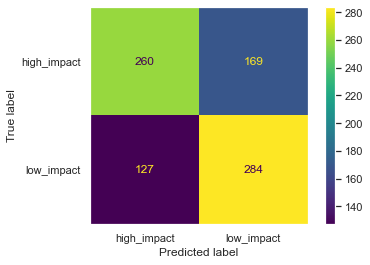

In [151]:

logistic_model = LogisticRegression()
logistic_model.fit(X=train_data,y=train_target).predict(test_data)
print("Classification Accuracy: ", logistic_model.score(test_data, test_target))
plot_confusion_matrix(logistic_model, test_data, test_target)
plt.grid(False)

In [152]:
df['impact'].value_counts()

low_impact     1400
high_impact    1400
Name: impact, dtype: int64

In [153]:
df['deaths_per_capita'].quantile(.9)

0.003124159220333974

In [154]:
# from sklearn.model_selection import cross_validate
# from sklearn.model_selection import GridSearchCV
# from sklearn.neighbors import KNeighborsClassifier

# # Write your code for question 4 here
# params_to_try = {'n_neighbors': range(1,30)}
# knn_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params_to_try)
# knn_search.fit(train_data, train_target)
# print(knn_search.best_params_)
# print("Accuracy on training data: ", knn_search.score(train_data, train_target))
# print("Accuracy on testing data: ", knn_search.score(test_data, test_target))

In [155]:
# from sklearn.tree import DecisionTreeClassifier

# clf = DecisionTreeClassifier(random_state=0)
# clf.fit(train_data, train_target)
# predictions = clf.predict(test_data)

# from sklearn.metrics import classification_report

# print(classification_report(test_target, predictions))

[-0.00104701]


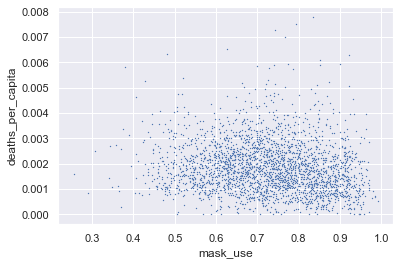

In [156]:
sns.scatterplot(data=df,x='mask_use', y='deaths_per_capita',s=2)

data = df[['mask_use']].values
target = df['deaths_per_capita'].values

linear_model = LinearRegression().fit(X=data,y=target)
prediction = linear_model.predict(data)
print(linear_model.coef_)

[0.01093783]


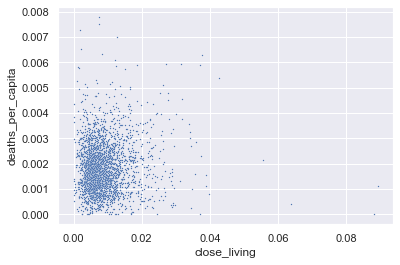

In [157]:
sns.scatterplot(data=df,x='close_living', y='deaths_per_capita',s=2)

data = df[['close_living']].values
target = df['deaths_per_capita'].values

linear_model = LinearRegression().fit(X=data,y=target)
prediction = linear_model.predict(data)
print(linear_model.coef_)

[8.2166982e-05]


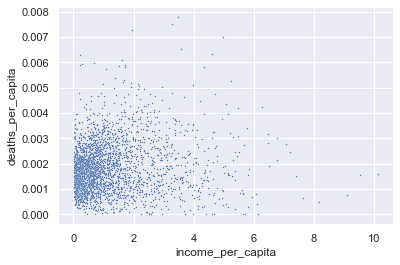

In [158]:
sns.scatterplot(data=df,x='income_per_capita', y='deaths_per_capita',s=2)

data = df[['income_per_capita']].values
target = df['deaths_per_capita'].values

linear_model = LinearRegression().fit(X=data,y=target)
prediction = linear_model.predict(data)
print(linear_model.coef_)

[0.35508059]


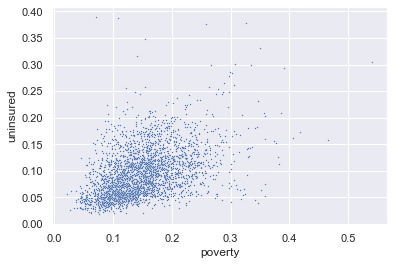

In [159]:
sns.scatterplot(data=df,x='poverty', y='uninsured',s=2)

data = df[['poverty']].values
target = df['uninsured'].values

linear_model = LinearRegression().fit(X=data,y=target)
prediction = linear_model.predict(data)
print(linear_model.coef_)

[0.00529309]


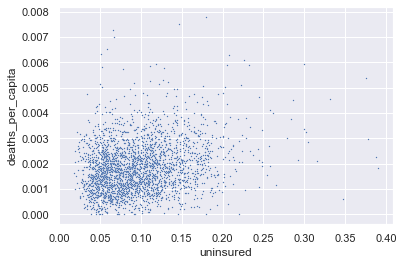

In [160]:
sns.scatterplot(data=df,x='uninsured', y='deaths_per_capita',s=2)

data = df[['uninsured']].values
target = df['deaths_per_capita'].values

linear_model = LinearRegression().fit(X=data,y=target)
prediction = linear_model.predict(data)
print(linear_model.coef_)

[0.00127327]


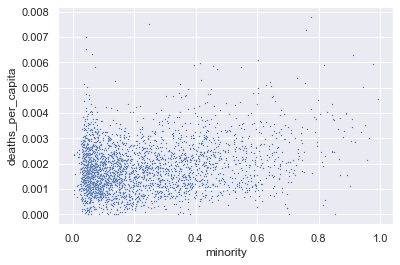

In [161]:
sns.scatterplot(data=df,x='minority', y='deaths_per_capita',s=2)

data = df[['minority']].values
target = df['deaths_per_capita'].values

linear_model = LinearRegression().fit(X=data,y=target)
prediction = linear_model.predict(data)
print(linear_model.coef_)

[0.00210386]


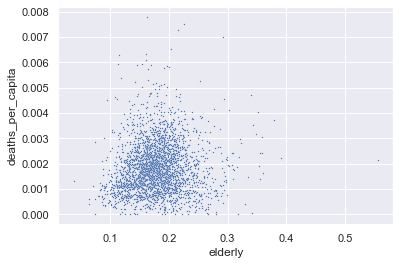

In [162]:
sns.scatterplot(data=df,x='elderly', y='deaths_per_capita',s=2)

data = df[['elderly']].values
target = df['deaths_per_capita'].values

linear_model = LinearRegression().fit(X=data,y=target)
prediction = linear_model.predict(data)
print(linear_model.coef_)

[0.01366918]


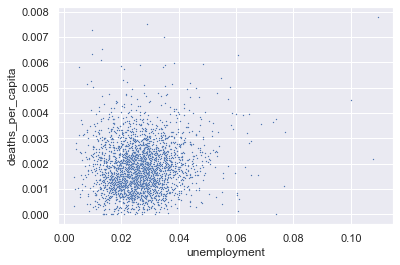

In [163]:
sns.scatterplot(data=df,x='unemployment', y='deaths_per_capita',s=2)

data = df[['unemployment']].values
target = df['deaths_per_capita'].values

linear_model = LinearRegression().fit(X=data,y=target)
prediction = linear_model.predict(data)
print(linear_model.coef_)

In [165]:
cases = pd.read_csv("Data/County_Cases_Time_Series.csv")
cases = cases[['FIPS','3/20/21']]
cases
df = pd.merge(df,cases,left_on='fips',right_on='FIPS').dropna()
df['cases_per_capita'] = df['3/20/21'] / df['population']
df = df.drop(['FIPS', '3/20/21'],axis=1)
df.head()
# # df['deaths_per_capita'] = df['deaths'] / df['population']
# # df = df.drop(['deaths'],axis=1)
# # df['income_per_capita'] = df['income'] / df['population']

,fips,name,mask_use,state,population,poverty,unemployment,elderly,minority,close_living,uninsured,deaths_per_capita,income_per_capita,workplaces_percent_change,impact,cases_per_capita
0,1001,Autauga County,0.739,alabama,55200,0.152572,0.019293,0.145833,0.249783,0.005417,0.070199,0.001848,0.532101,-0.223120,high_impact,0.117935
1,1003,Baldwin County,0.759,alabama,208107,0.104047,0.020869,0.195404,0.169812,0.004762,0.100256,0.001446,0.149937,-0.215617,low_impact,0.097685
2,1005,Barbour County,0.692,alabama,25782,0.255876,0.035606,0.179738,0.538515,0.012140,0.099217,0.002133,0.716042,-0.187912,high_impact,0.085796
3,1007,Bibb County,0.850,alabama,22527,0.127092,0.029209,0.162516,0.254184,0.002308,0.071869,0.002575,0.896657,-0.194046,high_impact,0.112221
4,1009,Blount County,0.653,alabama,57645,0.142597,0.015769,0.177518,0.128597,0.005881,0.109342,0.002290,0.393026,-0.231941,high_impact,0.110712


[0.57498339]


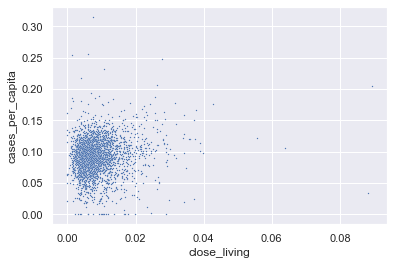

In [166]:
sns.scatterplot(data=df,x='close_living', y='cases_per_capita',s=2)

data = df[['close_living']].values
target = df['cases_per_capita'].values

linear_model = LinearRegression().fit(X=data,y=target)
prediction = linear_model.predict(data)
print(linear_model.coef_)

[0.02775201]


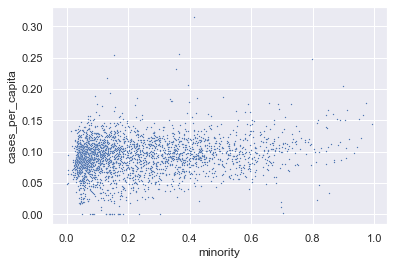

In [167]:
sns.scatterplot(data=df,x='minority', y='cases_per_capita',s=2)

data = df[['minority']].values
target = df['cases_per_capita'].values

linear_model = LinearRegression().fit(X=data,y=target)
prediction = linear_model.predict(data)
print(linear_model.coef_)

[0.10356018]


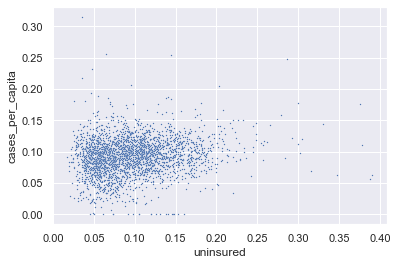

In [168]:
sns.scatterplot(data=df,x='uninsured', y='cases_per_capita',s=2)

data = df[['uninsured']].values
target = df['cases_per_capita'].values

linear_model = LinearRegression().fit(X=data,y=target)
prediction = linear_model.predict(data)
print(linear_model.coef_)

[-0.16283426]


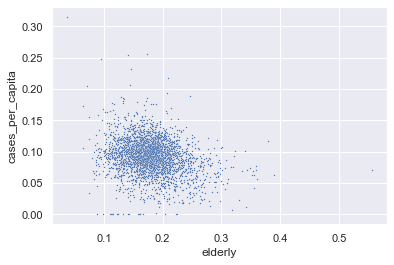

In [170]:
sns.scatterplot(data=df,x='elderly', y='cases_per_capita',s=2)

data = df[['elderly']].values
target = df['cases_per_capita'].values

linear_model = LinearRegression().fit(X=data,y=target)
prediction = linear_model.predict(data)
print(linear_model.coef_)

Classification Accuracy:  0.676530612244898


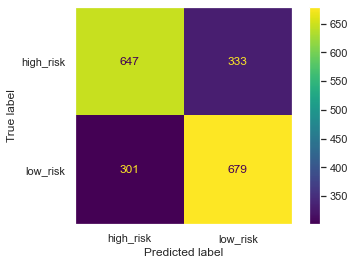

In [215]:
df['risk'] = ['high_risk' if (i > .0933564902092561) else 'low_risk'  for i in df['cases_per_capita']]


data = df.drop(columns=["fips",'name','state','population','impact','deaths_per_capita','cases_per_capita','risk'])
target = df['risk']
train_data, test_data, train_target, test_target = train_test_split(data, target, 
                                                                    test_size=0.7, 
                                                                    random_state=112)
logistic_model = LogisticRegression(max_iter=1000,C=50)
logistic_model.fit(X=train_data,y=train_target).predict(test_data)
print("Classification Accuracy: ", logistic_model.score(test_data, test_target))
plot_confusion_matrix(logistic_model, test_data, test_target)
plt.grid(False)

In [188]:
df['risk'].value_counts()


low_risk     2100
high_risk     700
Name: risk, dtype: int64